In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tweet_data.csv')

In [3]:
df.sample(10)

,textID,tweet_text,sentiment
17439,1753466788,"@DougieMcfly Haha dude, we have the same b-dat...",positive
12436,1695475562,@sli hope u did alright on the final,positive
18036,1753664844,follow @johnofisher just because... or don't e...,positive
5228,1963091044,@Ziggy420 my friday feels boring too. no time ...,negative
6337,1964012596,Gained 3lbs wish I could afford something othe...,negative
7632,1965256472,@Mitchelmusso: Am sad i got no money on my pho...,negative
17167,1753366289,"had the best mother's day! breakfast, shopping...",positive
12728,1695728175,@tommcfly You wouldnt change your fans for the...,positive
14954,1752224789,"i had a dream last night, and i was singing f...",negative
9377,1966345290,Missing nathan and the bccg already. And my be...,negative


In [4]:
print("No. of tweets are {}".format(len(df)))

No. of tweets are 18727


In [5]:
tweet_id=5724
tweet= df.iloc[tweet_id]
print("Tweet: {}".format(tweet['tweet_text']))
print('Sentiment: {}'.format(tweet['sentiment']))

Tweet: NO MORE MSHS!!!!!!!! Gotta go to work...too tired
Sentiment: negative


In [6]:
palette = sns.color_palette('rainbow')

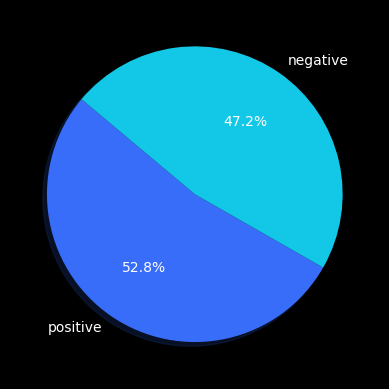

In [7]:
plt.style.use('dark_background');
sentiment_count=df['sentiment'].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%',startangle=140, shadow=True, colors=palette)
plt.show()

In [8]:
sentiment_count

sentiment
positive    9897
negative    8830
Name: count, dtype: int64

In [9]:
print("Number of positive tweets : {}".format(df[df['sentiment']=='positive'].count()[0]))
print("Number of negative tweets : {}".format(df[df['sentiment']=='negative'].count()[0]))

Number of positive tweets : 9897
Number of negative tweets : 8830


C:\Users\HP\AppData\Local\Temp\ipykernel_24376\1743358834.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of positive tweets : {}".format(df[df['sentiment']=='positive'].count()[0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_24376\1743358834.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of negative tweets : {}".format(df[df['sentiment']=='negative'].count()[0]))


In [10]:
from wordcloud import WordCloud

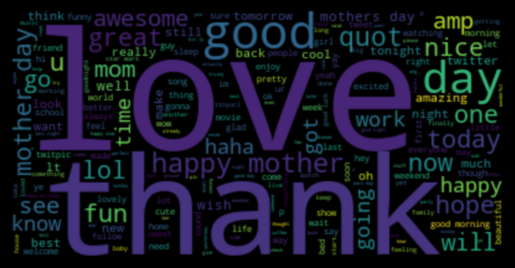

In [11]:
pos_tweets=df[df['sentiment']=='positive']
txt=" ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wc= WordCloud().generate(txt)
plt.imshow(wc, interpolation='bicubic',cmap='viridis')
plt.axis('off')
plt.show()

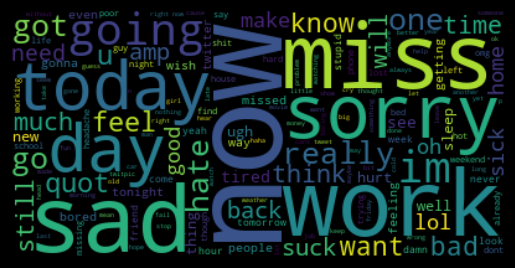

In [12]:
neg_tweets=df[df['sentiment']=='negative']
tx=" ".join(tweet.lower() for tweet in neg_tweets['tweet_text'])
wcd=WordCloud().generate(tx)
plt.imshow(wcd, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
import re

In [14]:
# REMOVING CAPITAL LETTERS
def remove_caps(tweet):
    return tweet.lower()

In [15]:
# REMOVING MULTIPLE OCCURRENCES OF LETTERS
def remove_mult_occ(tweet):
    tweet=re.sub(r'(.)\1+',r'\1\1',tweet)
    return tweet

In [16]:
# REMOVING MULTIPLE OCCURRENCES OF PUNCTUATION MARKS
import string
from string import punctuation
def remove_punct(tweet):
    return ''.join([x for x in tweet if x not in punctuation])

In [17]:
# WORD CONTRACTIONS
import contractions
def remove_contractions(tweet):
    return contractions.fix(tweet)

In [18]:
# REMOVE RE-TWEET
def remove_RT(tweet):
    tweet=re.sub('RT\s+',"",tweet)     # \s+ ---> space 
    return tweet

In [19]:
# REMOVE @SOMEBODY
def remove_at_the_rate(tweet):
    tweet=re.sub('\B@\w+','twitteruser',tweet)   # \w+ -->  consists of letters, digits, and underscores
    return tweet

In [20]:
# REMOVE EMOJI
import emoji
def remove_emoji(tweet):
    return emoji.demojize(tweet)

In [21]:
# REMOVE URLS
def remove_url(tweet):
    tweet = re.sub('(http|https)\:\/\/\S+','', tweet)
    return tweet

In [22]:
# REMOVE HASHTAGS
def remove_hashtag(tweet):
    tweet = re.sub('#+', '', tweet)
    return tweet

In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
def tokenize(tweet):
    return word_tokenize(tweet)

In [25]:
from nltk.corpus import stopwords

In [26]:
stop_words = stopwords.words('english')

In [27]:
# REMOVE STOPWORDS
def remove_stopwords(tweet):
    return ' '.join(x for x in tokenize(tweet) if x not in stop_words)

In [28]:
from nltk.stem import WordNetLemmatizer

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
from nltk.corpus import wordnet

In [31]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
def lemmatize_tweet(tweet):
    tokens = word_tokenize(tweet)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_tweet = ' '.join(lemmatized_tokens)
    return lemmatized_tweet

In [33]:
df['clean_tweet0'] = df['tweet_text'].apply(remove_at_the_rate)
df['clean_tweet1'] = df['clean_tweet0'].apply(remove_emoji)
df['clean_tweet2'] = df['clean_tweet1'].apply(remove_url)
df['clean_tweet3'] = df['clean_tweet2'].apply(remove_hashtag)
df['clean_tweet4'] = df['clean_tweet3'].apply(remove_caps)
df['clean_tweet5'] = df['clean_tweet4'].apply(remove_mult_occ)
df['clean_tweet6'] = df['clean_tweet5'].apply(remove_punct)
df['clean_tweet7'] = df['clean_tweet6'].apply(remove_contractions)
df['clean_tweet8'] = df['clean_tweet7'].apply(remove_RT)
df['clean_tweet9'] = df['clean_tweet8'].apply(remove_stopwords)
df['clean_tweet10'] = df['clean_tweet9'].apply(lemmatize_tweet)

In [34]:
df.head()

,textID,tweet_text,sentiment,clean_tweet0,clean_tweet1,clean_tweet2,clean_tweet3,clean_tweet4,clean_tweet5,clean_tweet6,clean_tweet7,clean_tweet8,clean_tweet9,clean_tweet10
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughh..waitin on y...,layin n bed with a headache ughhwaitin on you...,layin n bed with a headache ughhwaitin on you...,layin n bed with a headache ughhwaitin on you...,layin n bed headache ughhwaitin call,layin n bed headache ughhwaitin call
1,1956967696,Funeral ceremony...gloomy friday...,negative,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony..gloomy friday..,funeral ceremonygloomy friday,funeral ceremonygloomy friday,funeral ceremonygloomy friday,funeral ceremonygloomy friday,funeral ceremonygloomy friday
2,1956967789,wants to hang out with friends SOON!,positive,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon,wants to hang out with friends soon,wants to hang out with friends soon,wants hang friends soon,want hang friend soon
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,Re-pinging twitteruser: why didn't you go to p...,Re-pinging twitteruser: why didn't you go to p...,Re-pinging twitteruser: why didn't you go to p...,Re-pinging twitteruser: why didn't you go to p...,re-pinging twitteruser: why didn't you go to p...,re-pinging twitteruser: why didn't you go to p...,repinging twitteruser why didnt you go to prom...,repinging twitteruser why did not you go to pr...,repinging twitteruser why did not you go to pr...,repinging twitteruser go prom bf like friends,repinging twitteruser go prom bf like friend
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,Hmmm. http://www.djhero.com/ is down,Hmmm. http://www.djhero.com/ is down,Hmmm. is down,Hmmm. is down,hmmm. is down,hmm. is down,hmm is down,hmm is down,hmm is down,hmm,hmm


In [35]:
def sent_value(text):
    if text=='positive':
        return 1
    else:
        return 0
df['sentiment'] = df['sentiment'].apply(sent_value)

In [36]:
df.head()

,textID,tweet_text,sentiment,clean_tweet0,clean_tweet1,clean_tweet2,clean_tweet3,clean_tweet4,clean_tweet5,clean_tweet6,clean_tweet7,clean_tweet8,clean_tweet9,clean_tweet10
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,0,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughh..waitin on y...,layin n bed with a headache ughhwaitin on you...,layin n bed with a headache ughhwaitin on you...,layin n bed with a headache ughhwaitin on you...,layin n bed headache ughhwaitin call,layin n bed headache ughhwaitin call
1,1956967696,Funeral ceremony...gloomy friday...,0,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,funeral ceremony..gloomy friday..,funeral ceremonygloomy friday,funeral ceremonygloomy friday,funeral ceremonygloomy friday,funeral ceremonygloomy friday,funeral ceremonygloomy friday
2,1956967789,wants to hang out with friends SOON!,1,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends soon!,wants to hang out with friends soon!,wants to hang out with friends soon,wants to hang out with friends soon,wants to hang out with friends soon,wants hang friends soon,want hang friend soon
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,0,Re-pinging twitteruser: why didn't you go to p...,Re-pinging twitteruser: why didn't you go to p...,Re-pinging twitteruser: why didn't you go to p...,Re-pinging twitteruser: why didn't you go to p...,re-pinging twitteruser: why didn't you go to p...,re-pinging twitteruser: why didn't you go to p...,repinging twitteruser why didnt you go to prom...,repinging twitteruser why did not you go to pr...,repinging twitteruser why did not you go to pr...,repinging twitteruser go prom bf like friends,repinging twitteruser go prom bf like friend
4,1956968636,Hmmm. http://www.djhero.com/ is down,0,Hmmm. http://www.djhero.com/ is down,Hmmm. http://www.djhero.com/ is down,Hmmm. is down,Hmmm. is down,hmmm. is down,hmm. is down,hmm is down,hmm is down,hmm is down,hmm,hmm


In [37]:
new_df = df[['textID', 'clean_tweet10', 'sentiment']]

In [38]:
new_df

,textID,clean_tweet10,sentiment
0,1956967666,layin n bed headache ughhwaitin call,0
1,1956967696,funeral ceremonygloomy friday,0
2,1956967789,want hang friend soon,1
3,1956968477,repinging twitteruser go prom bf like friend,0
4,1956968636,hmm,0
...,...,...,...
18722,1753918818,amazing time last night mcfly incredible,1
18723,1753918881,twitteruser oo showing french skill lol thing ...,1
18724,1753918900,succesfully following tayla,1
18725,1753919001,happy mother day love,1


In [39]:
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
x = new_df['clean_tweet10'].values
y = new_df['sentiment'].values

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf = TfidfVectorizer()

In [44]:
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(max_iter=20)

In [47]:
model.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20)

In [48]:
prediction = model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1778
           1       0.88      0.87      0.88      1968

    accuracy                           0.87      3746
   macro avg       0.87      0.87      0.87      3746
weighted avg       0.87      0.87      0.87      3746



In [51]:
print(confusion_matrix(y_test, prediction))

[[1554  224]
 [ 248 1720]]


In [52]:
#import pickle

In [53]:
'''filename = 'trained_seniment_analysis_model.sav'
pickle.dump(model, open(filename, 'wb'))'''

"filename = 'trained_seniment_analysis_model.sav'\npickle.dump(model, open(filename, 'wb'))"

In [54]:
x_new = x_test[200]
print('original sentiment :', y_test[200])
pred = model.predict(x_new)
print('predicted sentiment :', pred)

original sentiment : 1
predicted sentiment : [1]


In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('clf', LogisticRegression())  # Logistic regression classifier
])

In [57]:
pipeline.fit(new_df['clean_tweet10'], new_df['sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [58]:
new_string = "I'm very sure she will kill me!"
sentiment_no = pipeline.predict([new_string])[0]
if sentiment_no == 1:
    print('Positive Tweet')
else:
    print('Negative Tweet')

Negative Tweet


In [59]:
new_string = "I'm sooooo sure she will love this art!"
sentiment_no = pipeline.predict([new_string])[0]
if sentiment_no == 1:
    print('Positive Tweet')
else:
    print('Negative Tweet')

Positive Tweet


In [102]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
# Tokenize sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
x_train_sequences = tokenizer.texts_to_sequences(X_train)
x_test_sequences = tokenizer.texts_to_sequences(X_test)

In [69]:
# Padding sequences
max_len = max([len(seq) for seq in x_train_sequences])
x_train_pad = pad_sequences(x_train_sequences, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_sequences, maxlen=max_len, padding='post')


In [72]:
# Train Word2Vec embeddings
word2vec_model = Word2Vec(sentences=X_train, window=5, min_count=1, workers=4)
word2vec_embeddings = word2vec_model.wv

In [73]:
# Prepare embedding matrix
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))  # Assuming Word2Vec embeddings are of size 100
for word, i in word_index.items():
    if word in word2vec_embeddings:
        embedding_matrix[i] = word2vec_embeddings[word]


In [103]:
# Build LSTM model with L2 regularization
model = Sequential()
model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [107]:
history = model.fit(x_train_pad, y_train, batch_size=32, epochs=10, validation_data=(x_test_pad, y_test), callbacks=[early_stopping])

Epoch 1/10
469/469 [==============================] - 33s 62ms/step - loss: 0.8666 - accuracy: 0.5273 - val_loss: 0.6921 - val_accuracy: 0.5254
Epoch 2/10
469/469 [==============================] - 31s 66ms/step - loss: 0.6919 - accuracy: 0.5293 - val_loss: 0.6919 - val_accuracy: 0.5254
Epoch 3/10
469/469 [==============================] - 31s 65ms/step - loss: 0.6917 - accuracy: 0.5293 - val_loss: 0.6922 - val_accuracy: 0.5254
Epoch 4/10
469/469 [==============================] - 32s 67ms/step - loss: 0.6917 - accuracy: 0.5293 - val_loss: 0.6919 - val_accuracy: 0.5254
Epoch 5/10
469/469 [==============================] - 31s 66ms/step - loss: 0.6918 - accuracy: 0.5293 - val_loss: 0.6919 - val_accuracy: 0.5254
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.6916 - accuracy: 0.5293 - val_loss: 0.6921 - val_accuracy: 0.5254
Epoch 7/10
469/469 [==============================] - 32s 68ms/step - loss: 0.6918 - accuracy: 0.5293 - val_loss: 0.6919 - val_accuracy:

In [108]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

118/118 [==============================] - 1s 12ms/step - loss: 0.6919 - accuracy: 0.5254
Test Loss: 0.6918736696243286, Test Accuracy: 0.5253604054450989


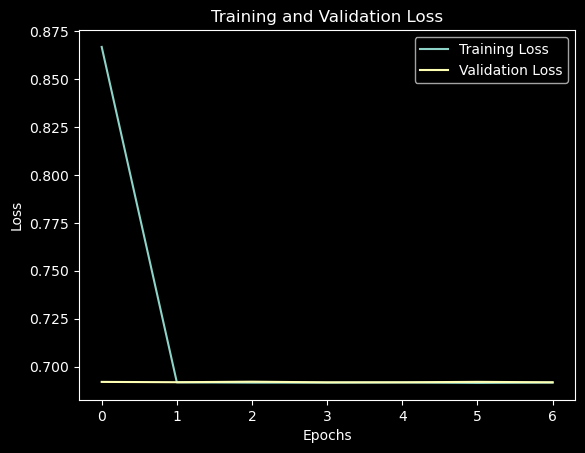

In [109]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

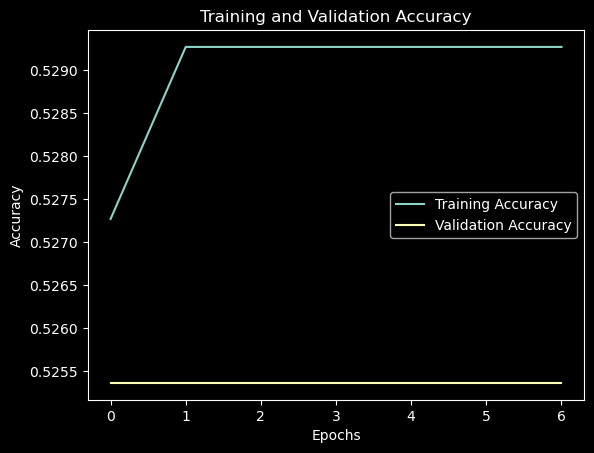

In [110]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [61]:
# Reshape TF-IDF vectors into sequences

from keras.preprocessing.sequence import pad_sequences
max_length = 100  # Define the maximum length of your sequences
X_train_padded = pad_sequences(x_train.toarray(), maxlen=max_length)
X_test_padded = pad_sequences(x_test.toarray(), maxlen=max_length)

In [76]:
# Reshape input data to have three dimensions
X_train_reshaped = X_train_padded.reshape(X_train_padded.shape[0], X_train_padded.shape[1], 1)
X_test_reshaped = X_test_padded.reshape(X_test_padded.shape[0], X_test_padded.shape[1], 1)

In [62]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [77]:
X_train_padded.shape

(14981, 100)

In [81]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


375/375 [==============================] - 28s 64ms/step - loss: 0.6921 - accuracy: 0.5251 - val_loss: 0.6917 - val_accuracy: 0.5289
Epoch 2/10
375/375 [==============================] - 26s 69ms/step - loss: 0.6918 - accuracy: 0.5278 - val_loss: 0.6915 - val_accuracy: 0.5289
Epoch 3/10
375/375 [==============================] - 26s 68ms/step - loss: 0.6918 - accuracy: 0.5278 - val_loss: 0.6916 - val_accuracy: 0.5289
Epoch 4/10
375/375 [==============================] - 26s 68ms/step - loss: 0.6916 - accuracy: 0.5278 - val_loss: 0.6918 - val_accuracy: 0.5289
Epoch 5/10
375/375 [==============================] - 26s 69ms/step - loss: 0.6917 - accuracy: 0.5278 - val_loss: 0.6916 - val_accuracy: 0.5289
Epoch 6/10
375/375 [==============================] - 25s 68ms/step - loss: 0.6917 - accuracy: 0.5278 - val_loss: 0.6915 - val_accuracy: 0.5289
Epoch 7/10
375/375 [==============================] - 26s 69ms/step - loss: 0.6918 - accuracy: 0.5278 - val_loss: 0.6915 - val_accurac

In [90]:
losses = pd.DataFrame(model.history.history)

In [91]:
losses[['loss','val_loss']].plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [86]:
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'